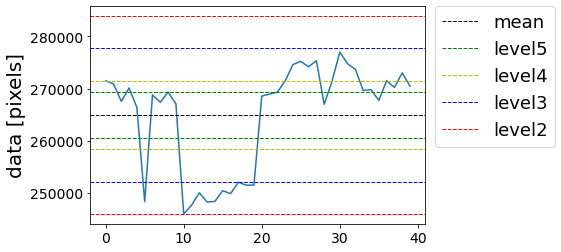

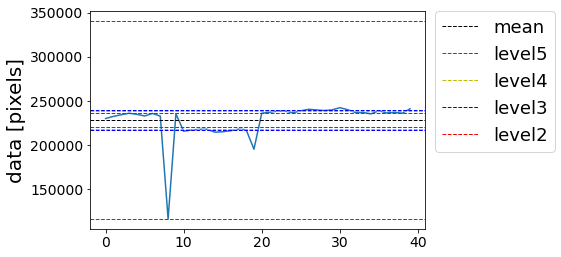

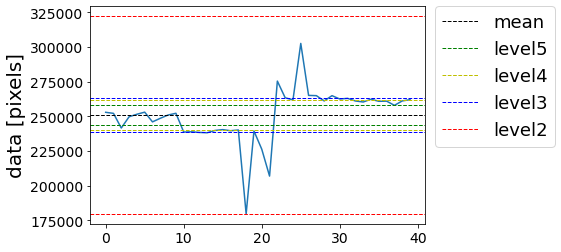

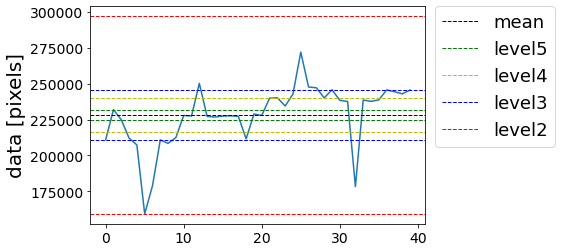

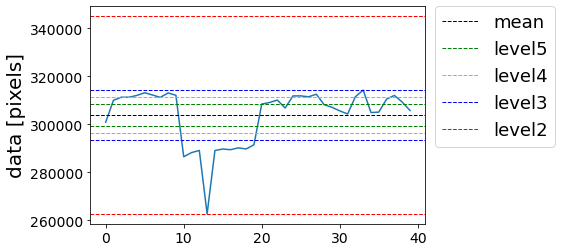

In [39]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter

path_dir = "./area"

program_list = os.listdir(path_dir)

for i in range(len(program_list)):
    program_name = program_list[i].replace(".csv", "")
    data = pd.read_csv(path_dir + "/" + program_name + ".csv")
    num = 40
    data_list = []
    mean_data = pd.read_csv("./analyze/mean.csv")
    level_data = []
    
    for k in range(num):
        data_list.append(float(data['data'].iloc[k]))
        
    mean = float(mean_data['means'].iloc[i])
    
    level = pd.read_csv("./analyze/" + program_name + "_level.csv")
    
    level1 = float(level.iloc[0])
    level2 = float(level.iloc[1])
    level3 = float(level.iloc[2])
    level4 = float(level.iloc[3])

        
    for l in range(len(data_list)):
        if mean-level1 <= data_list[l] <= mean+level1:
            level_data.append("level1") 
        elif (mean-level2 <= data_list[l] <= mean-level1) or (mean+level1 <= data_list[l] <= mean+level2):
            level_data.append("level2")
        elif (mean-level3 <= data_list[l] <= mean-level2) or (mean+level2 <= data_list[l] <= mean+level3):
            level_data.append("level3")
        elif (mean-level4 <= data_list[l] <= mean-level3) or (mean+level3 <= data_list[l] <= mean+level4):
            level_data.append("level4")
        else:
            level_data.append("level5")

            
    plt.rc('font', size=14)
    plt.rc('legend', fontsize=18)
    plt.rc('axes', labelsize=20)        
    plt.plot(data_list)
#    plt.title(program_name)

    plt.axhline(y=mean, color='k', linestyle='--', linewidth=1, label = 'mean')
    plt.axhline(y=mean-level1, color = 'g', linestyle='--', linewidth=1, label = 'level5')
    plt.axhline(y=mean+level1, color = 'g', linestyle='--', linewidth=1)
    plt.axhline(y=mean-level2, color = 'y', linestyle='--', linewidth=1, label = 'level4')
    plt.axhline(y=mean+level2, color = 'y', linestyle='--', linewidth=1)
    plt.axhline(y=mean-level3, color = 'b', linestyle='--', linewidth=1, label = 'level3')
    plt.axhline(y=mean+level3, color = 'b', linestyle='--', linewidth=1)
    plt.axhline(y=mean-level4, color = 'r', linestyle='--', linewidth=1, label = 'level2')
    plt.axhline(y=mean+level4, color = 'r', linestyle='--', linewidth=1)
    plt.legend(loc=2,bbox_to_anchor=(1.03,1.0), borderaxespad=0)
#    plt.xlabel('Index')
    plt.ylabel('data [pixels]')
    plt.show()
    
    result = Counter(level_data)       
#    print("level1 : " + str(result["level1"]) + "  level2 : " + str(result["level2"]) + "  level3 : " + str(result["level3"]) + "  level4 : " + str(result["level4"]) )
